# CS 24300: Final Project
## Aadya Pawar

# **Stocks & Financial Markets Analysis**
## This Project Analyses a data about S&P 500 to:
Link to the dataset: https://www.kaggle.com/datasets/andrewmvd/sp-500-stocks 
- Explore the S&P 500 stock market performance.
- Analyze company-level data to study sectoral trends, market capitalization, and volatility.
- Explore index-wide trends and compare with individual stock behaviors.

## Loading & Cleaning the Dataset

We have three datasets:

- sp500_stocks.csv: Contains daily stock data (price, volume, etc.) for the S&P 500.
- sp500_companies.csv: Contains company metadata for S&P 500 companies.
- sp500_index.csv: Contains daily values for the S&P 500 index itself.

In [5]:
import pandas as pd

# Load datasets
stocks_df = pd.read_csv('sp500_stocks.csv')
index_df = pd.read_csv('sp500_index.csv')
companies_df = pd.read_csv('sp500_companies.csv')

print("Stocks DataFrame Columns:", stocks_df.columns)
print("Index DataFrame Columns:", index_df.columns)
print("Companies DataFrame Columns:", companies_df.columns)

# Convert 'Date' columns to datetime format
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
index_df['Date'] = pd.to_datetime(index_df['Date'])

# Clean stocks data
stocks_df.ffill(inplace=True)

# Clean index data
index_df.ffill(inplace=True)

# Clean companies data
numeric_cols = ['Marketcap', 'Currentprice', 'Revenuegrowth', 'Ebitda', 'Weight']
for col in numeric_cols:
    companies_df[col] = companies_df[col].fillna(companies_df[col].median())

# Merge datasets
stocks_companies_df = pd.merge(stocks_df, companies_df, on='Symbol', how='inner')
final_df = pd.merge(stocks_companies_df, index_df, on='Date', how='inner')

final_df.sort_values(by='Date', ascending=False, inplace=True)
final_df.to_csv("final_complete_dataset.csv", index=False)

final_df.head()

Stocks DataFrame Columns: Index(['Date', 'Symbol', 'Adj Close', 'Close', 'High', 'Low', 'Open',
       'Volume'],
      dtype='object')
Index DataFrame Columns: Index(['Date', 'S&P500'], dtype='object')
Companies DataFrame Columns: Index(['Exchange', 'Symbol', 'Shortname', 'Longname', 'Sector', 'Industry',
       'Currentprice', 'Marketcap', 'Ebitda', 'Revenuegrowth', 'City', 'State',
       'Country', 'Fulltimeemployees', 'Longbusinesssummary', 'Weight'],
      dtype='object')


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight,S&P500
1266050,2024-11-22,ZTS,176.960007,176.960007,178.070007,176.279999,176.350006,1854600.0,NYQ,Zoetis Inc.,...,80627695616,3.764000e+09,0.110,Parsippany,NJ,United States,14100.0,"Zoetis Inc. engages in the discovery, developm...",0.001446,5969.34
1205642,2024-11-22,VMC,284.609985,284.609985,284.920013,280.089996,281.350006,502700.0,NYQ,Vulcan Materials Company (Holdi,...,38346551296,1.985700e+09,-0.083,Birmingham,AL,United States,10961.0,"Vulcan Materials Company, together with its su...",0.000688,5969.34
848228,2024-11-22,NWSA,29.490000,29.490000,29.900000,29.450001,29.530001,3412000.0,NMS,News Corporation,...,17232832512,1.270000e+09,0.031,New York,NY,United States,23900.0,"News Corporation, a media and information serv...",0.000309,5969.34
417821,2024-11-22,EW,70.480003,70.480003,71.000000,69.959999,70.309998,2711600.0,NYQ,Edwards Lifesciences Corporatio,...,42035044352,2.052400e+09,0.089,Irvine,CA,United States,19800.0,Edwards Lifesciences Corporation provides prod...,0.000754,5969.34
614147,2024-11-22,HII,198.949997,198.949997,200.770004,195.460007,196.000000,659000.0,NYQ,"Huntington Ingalls Industries,",...,7782035456,1.071000e+09,-0.024,Newport News,VA,United States,44000.0,"Huntington Ingalls Industries, Inc. designs, b...",0.000140,5969.34


## Exploratory Analysis of the Dataset & Visualizations

In [7]:
# Statistical summary for numerical columns
print(final_df.describe())

# Summary for categorical columns
categorical_cols = ['Sector', 'Industry', 'Exchange', 'Country']
for col in categorical_cols:
    if col in final_df.columns:
        print(f"--- {col} ---")
        print(final_df[col].value_counts())

                                Date     Adj Close         Close  \
count                        1266051  1.266051e+06  1.266051e+06   
mean   2019-11-24 18:35:36.829559040  1.246599e+02  1.303618e+02   
min              2014-11-24 00:00:00  3.230215e-01  4.785000e-01   
25%              2017-05-25 00:00:00  4.121790e+01  4.608000e+01   
50%              2019-11-22 00:00:00  7.434216e+01  8.076000e+01   
75%              2022-05-24 00:00:00  1.380000e+02  1.451315e+02   
max              2024-11-22 00:00:00  9.924400e+03  9.924400e+03   
std                              NaN  2.492020e+02  2.494265e+02   

               High           Low          Open        Volume  Currentprice  \
count  1.266051e+06  1.266051e+06  1.266051e+06  1.266051e+06  1.266051e+06   
mean   1.318132e+02  1.288677e+02  1.303443e+02  6.149039e+06  2.320800e+02   
min    4.875000e-01  4.735000e-01  4.812500e-01  0.000000e+00  9.060000e+00   
25%    4.668000e+01  4.558689e+01  4.613000e+01  9.978000e+05  7.161000

### S&P Index over time and Number of Companies by sector 

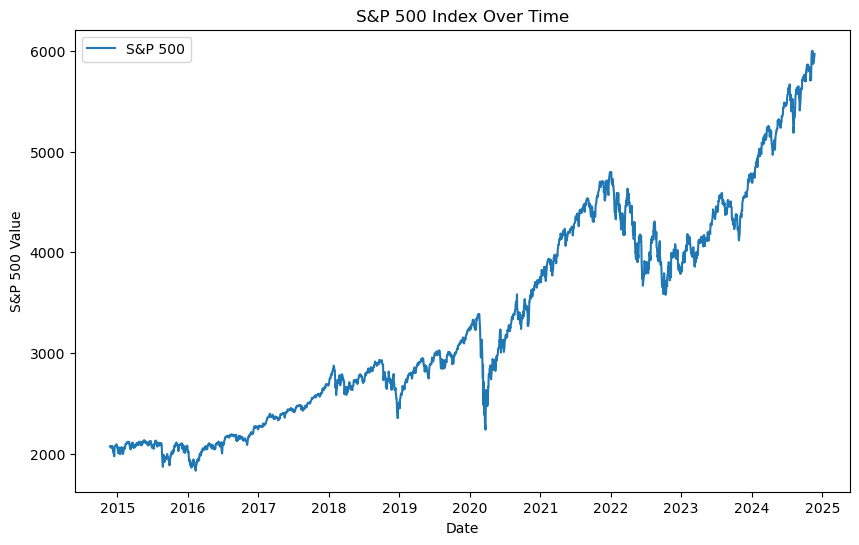

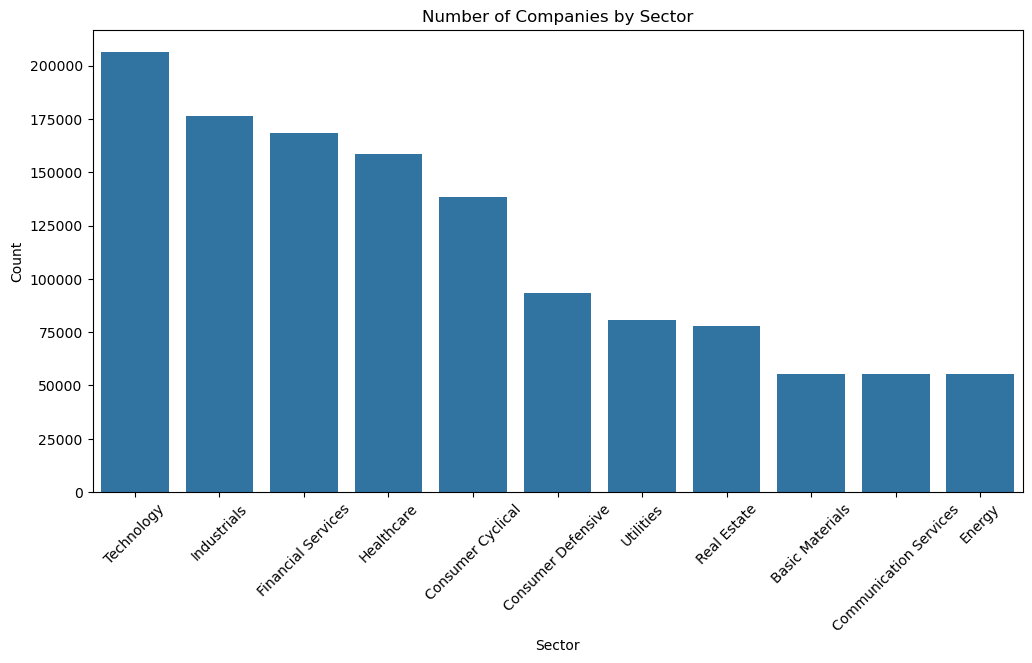

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.plot(final_df['Date'], final_df['S&P500'], label='S&P 500')
plt.title('S&P 500 Index Over Time')
plt.xlabel('Date')
plt.ylabel('S&P 500 Value')
plt.legend()
plt.show()

if 'Sector' in final_df.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=final_df, x='Sector', order=final_df['Sector'].value_counts().index)
    plt.title('Number of Companies by Sector')
    plt.xlabel('Sector')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

### Correlation of Key Features

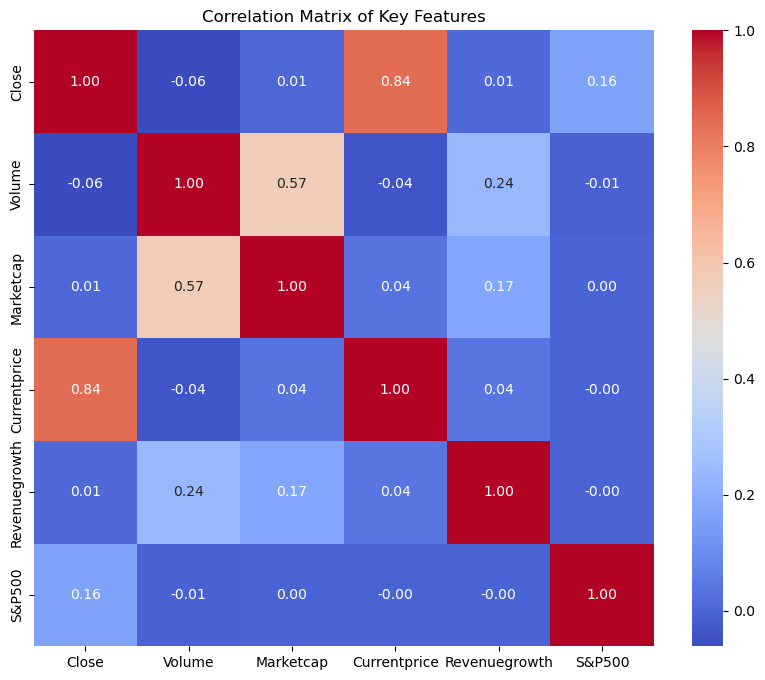

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = final_df[['Close', 'Volume', 'Marketcap', 'Currentprice', 'Revenuegrowth', 'S&P500']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Key Features')
plt.show()

### Distribution of Stock Close Prices

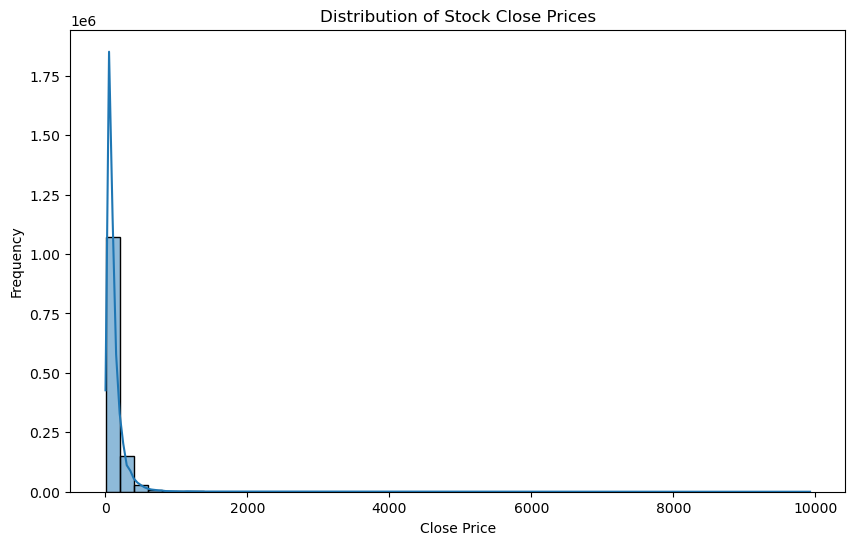

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Close'], bins=50, kde=True)
plt.title('Distribution of Stock Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

### Total Volume Traded over time

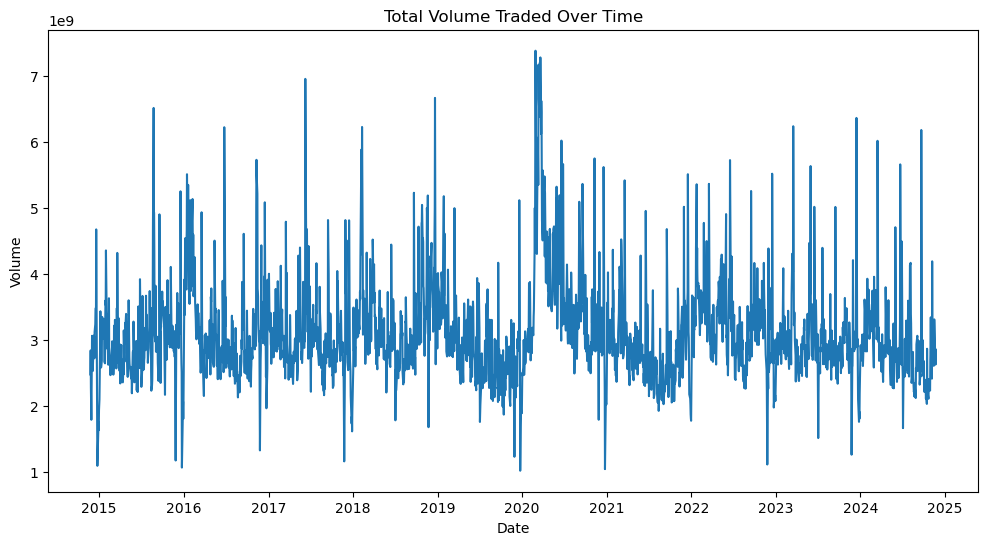

In [15]:
volume_over_time = final_df.groupby('Date')['Volume'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(volume_over_time['Date'], volume_over_time['Volume'])
plt.title('Total Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

### Performance of Top 5 stocks

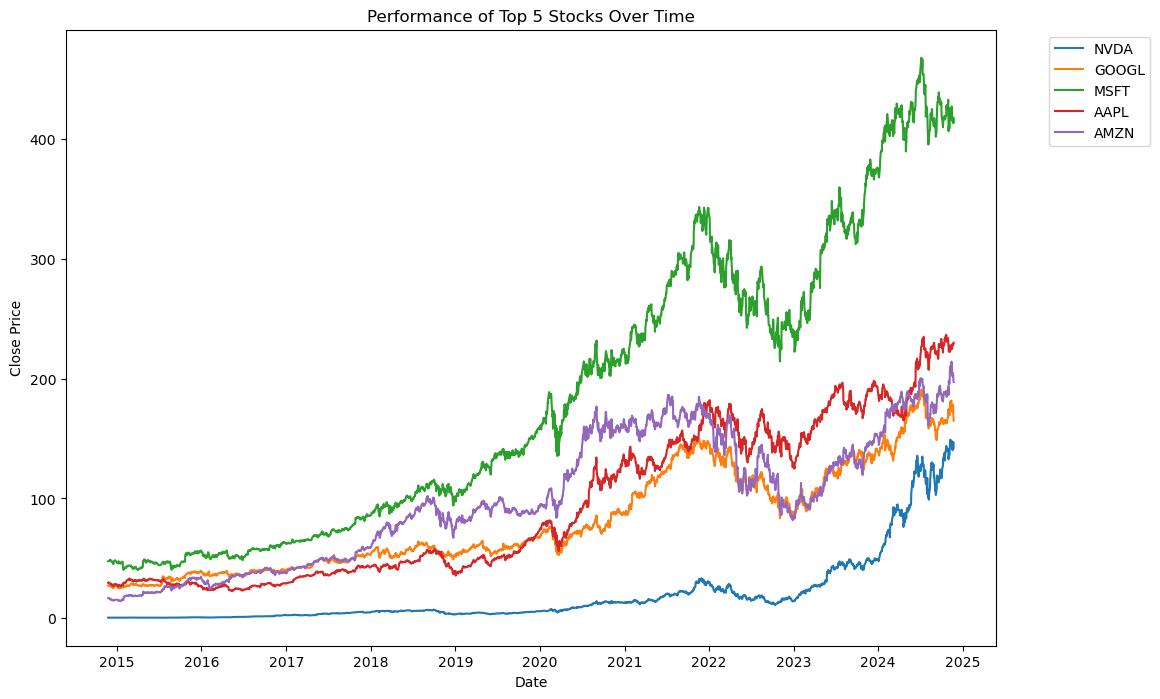

In [17]:
top_stocks = final_df.groupby('Symbol')['Marketcap'].mean().nlargest(5).index
top_stocks_df = final_df[final_df['Symbol'].isin(top_stocks)]
plt.figure(figsize=(12, 8))
sns.lineplot(data=top_stocks_df, x='Date', y='Close', hue='Symbol')
plt.title('Performance of Top 5 Stocks Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Market Cao vs Revenue Growth

C:\Users\aadya\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


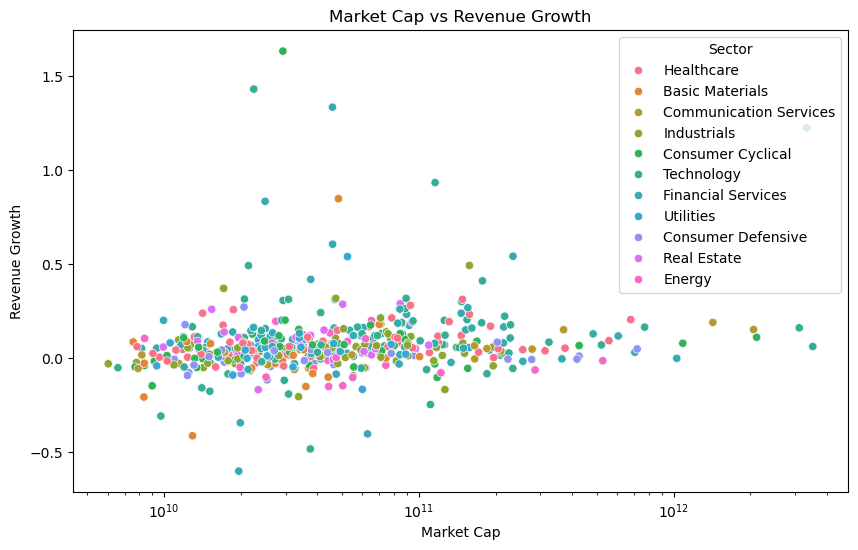

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Marketcap', y='Revenuegrowth', hue='Sector' if 'Sector' in final_df.columns else None)
plt.title('Market Cap vs Revenue Growth')
plt.xlabel('Market Cap')
plt.ylabel('Revenue Growth')
plt.xscale('log')  # Use a logarithmic scale for Marketcap
plt.show()

### Sector-Wise Performance Over Time

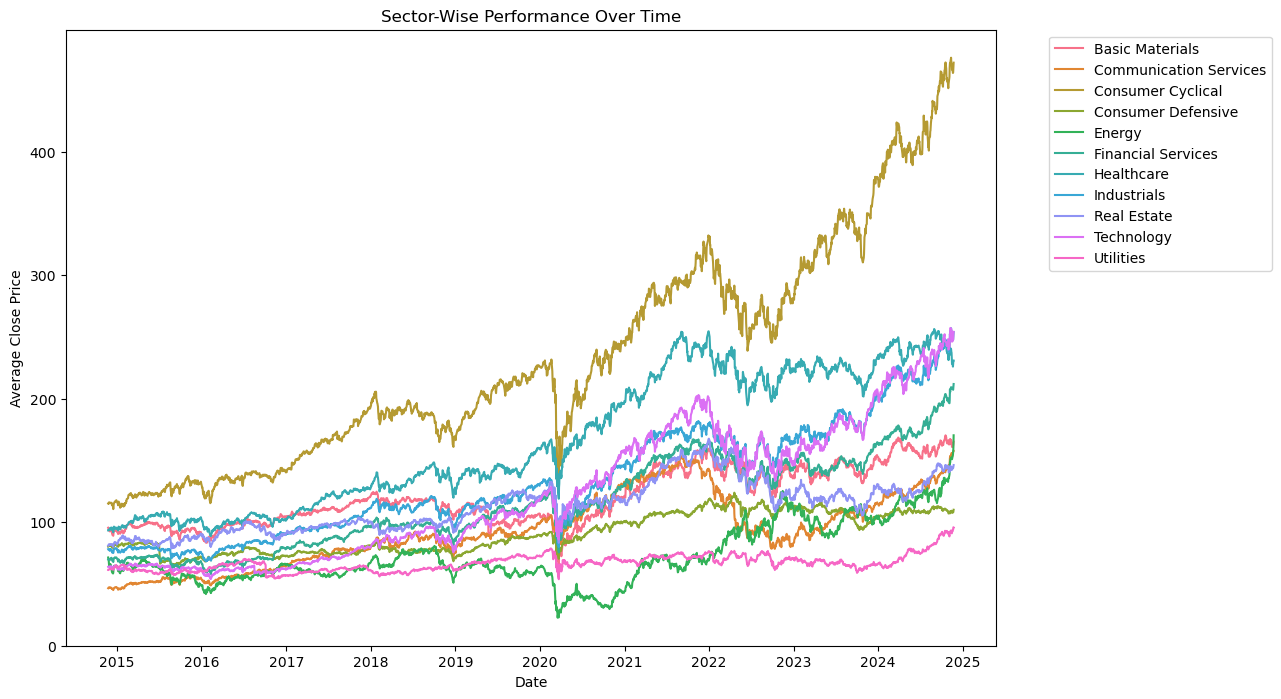

In [21]:
if 'Sector' in final_df.columns:
    sector_performance = final_df.groupby(['Date', 'Sector'])['Close'].mean().reset_index()

    plt.figure(figsize=(12, 8))
    sns.lineplot(data=sector_performance, x='Date', y='Close', hue='Sector')
    plt.title('Sector-Wise Performance Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Close Price')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### Calculating Percentage Change in the Closing of the Stock Prices, calculating volatility and relative performance of the stock

In [23]:
# Calculate percentage change in stock prices
final_df['Pct_Change_Close'] = final_df.groupby('Symbol')['Close'].pct_change() * 100

# Calculate volatility (daily high-low range as a percentage of the open price)
final_df['Volatility (%)'] = ((final_df['High'] - final_df['Low']) / final_df['Open']) * 100

# Relative performance compared to S&P500
final_df['Relative_Performance'] = final_df['Close'] / final_df['S&P500']
print(final_df[['Date', 'Symbol', 'Close', 'S&P500', 'Relative_Performance']].head())

              Date Symbol       Close   S&P500  Relative_Performance
1266050 2024-11-22    ZTS  176.960007  5969.34              0.029645
1205642 2024-11-22    VMC  284.609985  5969.34              0.047679
848228  2024-11-22   NWSA   29.490000  5969.34              0.004940
417821  2024-11-22     EW   70.480003  5969.34              0.011807
614147  2024-11-22    HII  198.949997  5969.34              0.033329


## Performing PCA

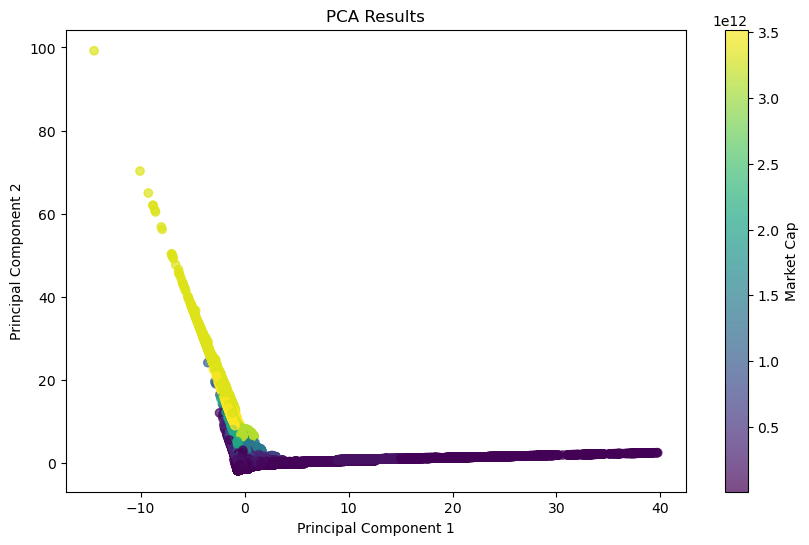

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numeric_features = ['Close', 'Volume', 'Marketcap', 'Currentprice', 'Revenuegrowth']
data_for_pca = final_df[numeric_features].dropna()

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

pca = PCA(n_components=2)  # Reduce to 2 components for visualization
pca_result = pca.fit_transform(data_scaled)

final_df['PCA1'] = pca_result[:, 0]
final_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
plt.scatter(final_df['PCA1'], final_df['PCA2'], alpha=0.7, c=final_df['Marketcap'], cmap='viridis')
plt.colorbar(label='Market Cap')
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [26]:
print("PCA Component Contributions:")
print(pca.components_)

PCA Component Contributions:
[[ 0.70401244 -0.09997489 -0.02852812  0.70244716  0.01120902]
 [ 0.04240742  0.65501184  0.64202586  0.07057519  0.38985002]]


## K-means clustering based on the PCA results

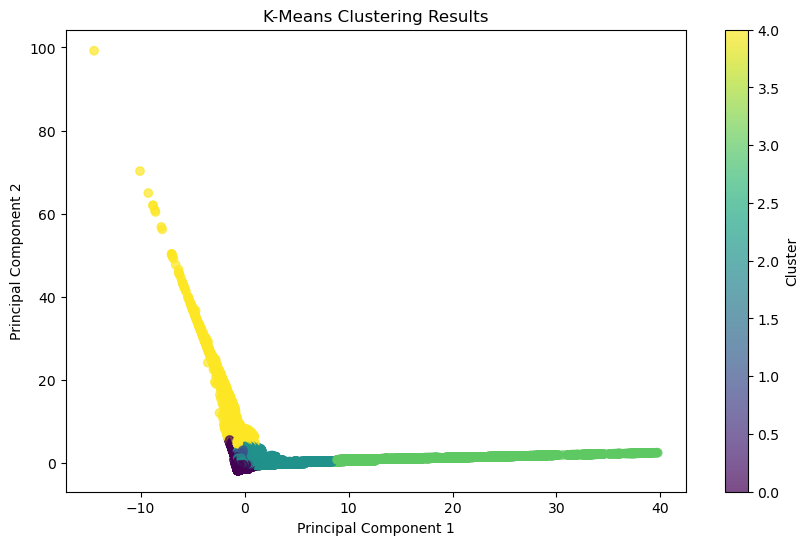

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42) 
final_df['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(final_df['PCA1'], final_df['PCA2'], c=final_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [29]:
cluster_summary = final_df.groupby('Cluster')[['Marketcap', 'Close', 'Volume', 'Revenuegrowth', 'Currentprice']].mean()
print("Cluster Summary:")
print(cluster_summary)

Cluster Summary:
            Marketcap        Close        Volume  Revenuegrowth  Currentprice
Cluster                                                                      
0        5.832646e+10    85.278235  4.732306e+06       0.014956    127.477939
1        4.777695e+10    66.728949  8.805110e+06       1.168167     88.288333
2        1.410828e+11   218.382776  3.867980e+06       0.170542    431.291002
3        9.252047e+10  2881.696333  2.203399e+05       0.076755   6644.422639
4        2.590915e+12    93.882186  1.297694e+08       0.294467    228.751891


### Sector Distribution by Clusters

Sector Distribution Across Clusters:
Sector   Basic Materials  Communication Services  Consumer Cyclical  \
Cluster                                                               
0                  47635                   43367             105618   
1                   2517                       0               2517   
2                   5222                    6909              20995   
3                      0                       0               5812   
4                      0                    5098               3493   

Sector   Consumer Defensive  Energy  Financial Services  Healthcare  \
Cluster                                                               
0                     85423   50157               91831      104369   
1                         0       0                5034           0   
2                      7703    5217               71756       54200   
3                         0       0                   0           0   
4                         3       0    

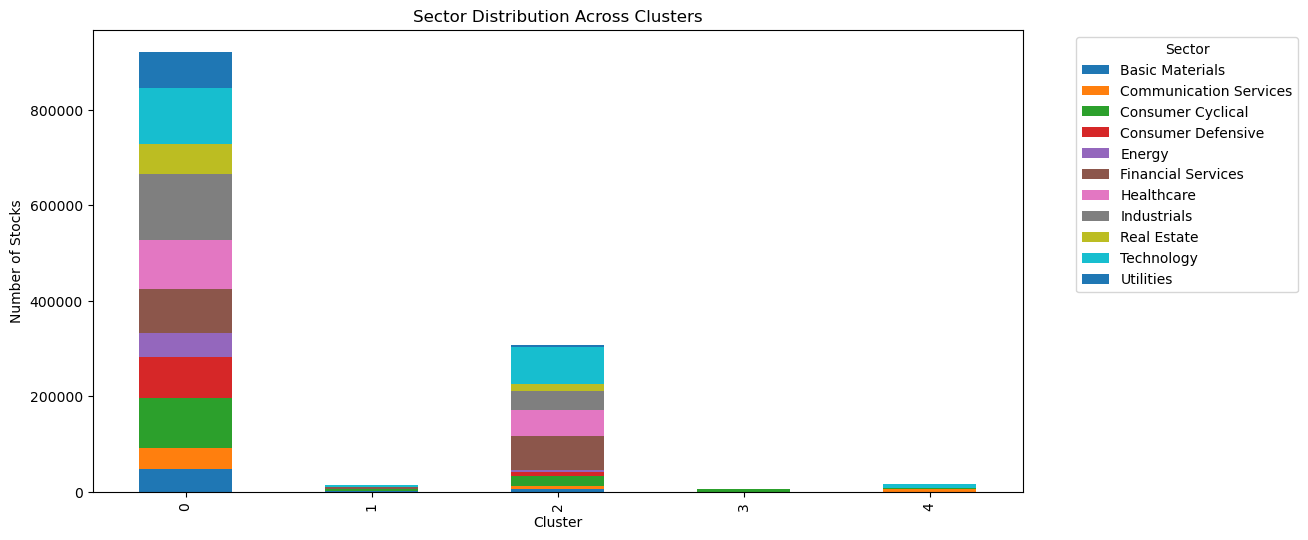

In [31]:
if 'Sector' in final_df.columns:
    sector_distribution = final_df.groupby(['Cluster', 'Sector']).size().unstack(fill_value=0)
    print("Sector Distribution Across Clusters:")
    print(sector_distribution)

    sector_distribution.plot(kind='bar', stacked=True, figsize=(12, 6))
    plt.title('Sector Distribution Across Clusters')
    plt.xlabel('Cluster')
    plt.ylabel('Number of Stocks')
    plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

### Outliers 

#### Outliers in Cluster 1

In [34]:
outliers = final_df[final_df['Cluster'] == 1].sort_values(by='Currentprice', ascending=False).head(10)
print("Outliers in Cluster 1:")
outliers

Outliers in Cluster 1:


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Fulltimeemployees,Longbusinesssummary,Weight,S&P500,Pct_Change_Close,Volatility (%),Relative_Performance,PCA1,PCA2,Cluster
269319,2014-11-24,CINF,38.410969,51.310001,51.889999,51.240002,51.889999,465000.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,2069.41,1.684507,1.252645,0.024795,-0.243380,1.323649,1
271512,2023-08-14,CINF,103.274498,106.860001,107.769997,106.480003,107.730003,530500.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,4489.72,1.164445,1.197432,0.023801,-0.086833,1.334698,1
271514,2023-08-16,CINF,102.124428,105.669998,106.849998,105.349998,105.349998,394100.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,4404.33,0.513651,1.423825,0.023992,-0.089682,1.331154,1
270122,2018-02-02,CINF,63.889851,76.379997,77.680000,76.309998,76.949997,459800.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,2762.13,4.074122,1.780381,0.027653,-0.172599,1.327784,1
271251,2022-07-29,CINF,91.481277,97.339996,98.809998,96.419998,97.690002,2575600.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,4130.29,2.581934,2.446514,0.023567,-0.121350,1.383177,1
270123,2018-02-05,CINF,61.388809,73.389999,76.400002,73.080002,75.930000,965900.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,2648.94,1.088156,4.372448,0.027705,-0.182931,1.339673,1
270124,2018-02-06,CINF,60.727978,72.599998,73.129997,69.980003,72.349998,1153000.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,2695.14,-0.041304,4.353827,0.026937,-0.185860,1.344122,1
271513,2023-08-15,CINF,102.085762,105.629997,106.400002,105.180000,105.970001,497600.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,4437.86,-0.037855,1.151270,0.023802,-0.090182,1.333683,1
270780,2020-09-15,CINF,68.567528,75.980003,77.739998,75.790001,77.470001,497200.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,3401.20,-1.580303,2.517099,0.022339,-0.173868,1.328632,1
270125,2018-02-07,CINF,60.753090,72.629997,73.839996,72.269997,72.269997,1037500.0,NMS,Cincinnati Financial Corporatio,...,5426.0,"Cincinnati Financial Corporation, together wit...",0.000447,2681.66,3.255617,2.172409,0.027084,-0.185344,1.341298,1


#### Outliers in Cluster 2

In [36]:
outliers = final_df[final_df['Cluster'] == 2].sort_values(by='Currentprice', ascending=False).head(10)
print("Outliers in Cluster 2:")
outliers

Outliers in Cluster 2:


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Fulltimeemployees,Longbusinesssummary,Weight,S&P500,Pct_Change_Close,Volatility (%),Relative_Performance,PCA1,PCA2,Cluster
128632,2015-12-14,AZO,760.500000,760.500000,761.609985,748.039978,755.880005,225100.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,2021.94,-0.105082,1.795259,0.376124,5.640248,0.273440,2
128570,2015-09-16,AZO,732.719971,732.719971,734.039978,726.369995,728.369995,183900.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,1995.31,-0.258640,1.053034,0.367221,5.561992,0.267708,2
129289,2018-07-25,AZO,705.719971,705.719971,707.030029,698.260010,705.020020,272500.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,2846.07,-0.762163,1.243939,0.247963,5.485453,0.265288,2
130022,2021-06-23,AZO,1443.030029,1443.030029,1449.949951,1418.260010,1436.540039,174300.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,4241.84,-0.791999,2.205991,0.340190,7.566897,0.388240,2
129823,2020-09-08,AZO,1211.489990,1211.489990,1224.300049,1196.430054,1204.780029,159700.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,3331.84,-1.744526,2.313285,0.363610,6.913424,0.348515,2
128626,2015-12-04,AZO,760.989990,760.989990,761.650024,754.239990,759.590027,401000.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,2091.69,1.172608,0.975531,0.363816,5.640973,0.277833,2
128687,2016-03-04,AZO,777.619995,777.619995,784.710022,773.869995,784.710022,276500.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,1999.99,0.865164,1.381405,0.388812,5.688378,0.277610,2
128751,2016-06-06,AZO,756.119995,756.119995,762.090027,748.929993,761.309998,384000.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,2109.41,-0.620371,1.728604,0.358451,5.627291,0.276588,2
129239,2018-05-14,AZO,666.020020,666.020020,669.510010,660.219971,660.219971,267700.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,2730.13,1.813019,1.407113,0.243952,5.373417,0.258420,2
128983,2017-05-08,AZO,709.979980,709.979980,711.000000,703.270020,703.270020,202400.0,NYQ,"AutoZone, Inc.",...,75600.0,"AutoZone, Inc. retails and distributes automot...",0.000943,2399.38,0.414397,1.099148,0.295901,5.497739,0.264295,2


#### Outliers in Cluster 3

In [38]:
outliers = final_df[final_df['Cluster'] == 3].sort_values(by='Currentprice', ascending=False).head(10)
print("Outliers in Cluster 3:")
outliers

Outliers in Cluster 3:


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Fulltimeemployees,Longbusinesssummary,Weight,S&P500,Pct_Change_Close,Volatility (%),Relative_Performance,PCA1,PCA2,Cluster
878433,2014-11-24,NVR,1238.739990,1238.739990,1244.979980,1230.000000,1239.989990,24500.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,2069.41,-0.422029,1.208073,0.598596,15.228206,1.064105,3
880196,2021-11-24,NVR,5351.399902,5351.399902,5364.040039,5286.109863,5327.109863,12700.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,4701.46,1.139646,1.462898,1.138242,26.836341,1.763049,3
879187,2017-11-21,NVR,3377.000000,3377.000000,3415.699951,3329.500000,3329.750000,27000.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,2599.03,-1.176979,2.588781,1.299331,21.263492,1.427712,3
879188,2017-11-22,NVR,3417.219971,3417.219971,3421.899902,3350.949951,3377.000000,25800.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,2597.08,0.465696,2.100976,1.315793,21.377018,1.434521,3
880200,2021-12-01,NVR,5404.560059,5404.560059,5410.000000,5193.689941,5268.520020,60900.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,4513.04,-2.606153,4.105708,1.197543,26.986206,1.773268,3
880199,2021-11-30,NVR,5225.339844,5225.339844,5301.149902,5170.279785,5252.580078,54000.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,4567.00,-3.316093,2.491540,1.144151,26.480378,1.742628,3
879189,2017-11-24,NVR,3401.379883,3401.379883,3434.989990,3393.419922,3434.989990,12800.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,2602.42,-0.077559,1.210195,1.307007,21.332357,1.431510,3
880198,2021-11-29,NVR,5281.729980,5281.729980,5343.459961,5260.540039,5320.000000,18500.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,4655.27,1.079167,1.558645,1.134570,26.639674,1.751346,3
879190,2017-11-27,NVR,3404.020020,3404.020020,3467.800049,3398.270020,3407.000000,35400.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,2601.42,0.206358,2.040799,1.308524,21.339725,1.432512,3
879191,2017-11-28,NVR,3397.010010,3397.010010,3435.120117,3385.010010,3410.000000,36500.0,NYQ,"NVR, Inc.",...,6300.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000511,2627.04,-2.058295,1.469505,1.293094,21.319935,1.431347,3


#### Outliers in Cluster 4

In [40]:
outliers = final_df[final_df['Cluster'] == 4].sort_values(by='Currentprice', ascending=False).head(10)
print("Outliers in Cluster 4:")
outliers

Outliers in Cluster 4:


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Fulltimeemployees,Longbusinesssummary,Weight,S&P500,Pct_Change_Close,Volatility (%),Relative_Performance,PCA1,PCA2,Cluster
785651,2016-04-13,META,110.510002,110.510002,112.650002,106.519997,112.230003,88227400.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,2082.42,-0.297721,5.462002,0.053068,-0.028624,4.937224,4
787235,2022-07-28,META,160.720001,160.720001,161.509995,154.850006,161.059998,73214300.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,4072.43,1.018224,4.135098,0.039465,0.169228,4.577990,4
787116,2022-02-04,META,237.089996,237.089996,242.610001,230.110001,234.970001,89342200.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,4500.53,5.415496,5.319828,0.052680,0.324483,4.986054,4
787366,2023-02-03,META,186.529999,186.529999,196.770004,182.889999,183.470001,76809700.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,4136.48,0.252607,7.565272,0.045094,0.228634,4.670454,4
785599,2016-01-28,META,109.110001,109.110001,110.339996,104.809998,107.199997,107475300.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,1893.36,-2.762676,5.158581,0.057628,-0.104543,5.408496,4
787115,2022-02-03,META,237.759995,237.759995,248.000000,235.750000,244.649994,188119900.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,4477.44,0.282592,5.007153,0.053102,-0.042950,7.405893,4
787365,2023-02-02,META,188.770004,188.770004,197.160004,180.160004,183.380005,150475700.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,4179.76,1.200882,9.270367,0.045163,-0.040476,6.475406,4
785473,2015-07-29,META,96.989998,96.989998,97.279999,94.739998,96.320000,64648300.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,2108.57,1.869550,2.637044,0.045998,0.021376,4.357316,4
786356,2019-01-31,META,166.690002,166.690002,171.679993,165.000000,165.600006,77233600.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,2704.10,0.591392,4.033812,0.061643,0.171051,4.677465,4
785474,2015-07-30,META,95.209999,95.209999,95.809998,91.800003,94.910004,86211300.0,NMS,"Meta Platforms, Inc.",...,72404.0,"Meta Platforms, Inc. engages in the developmen...",0.025588,2108.63,1.276457,4.225049,0.045153,-0.064271,4.885235,4


#### Outliers in Cluster 5

In [42]:
outliers = final_df[final_df['Cluster'] == 5].sort_values(by='Currentprice', ascending=False).head(10)
print("Outliers in Cluster 5:")
outliers

Outliers in Cluster 5:


,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Exchange,Shortname,...,Fulltimeemployees,Longbusinesssummary,Weight,S&P500,Pct_Change_Close,Volatility (%),Relative_Performance,PCA1,PCA2,Cluster


## Adding new features

In [44]:
final_df['Relative_Performance'] = final_df['Close'] / final_df['S&P500']

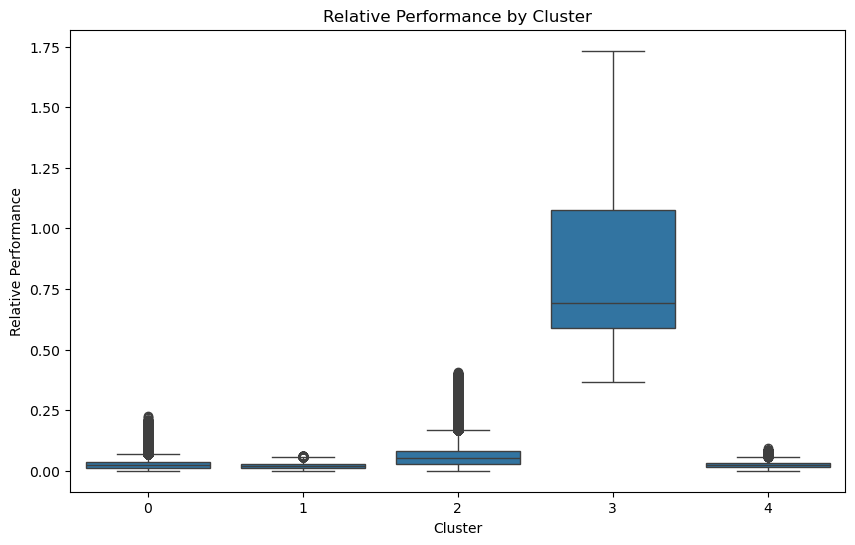

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='Relative_Performance', data=final_df)
plt.title('Relative Performance by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Relative Performance')
plt.show()

In [46]:
final_df['Volatility (%)'] = ((final_df['High'] - final_df['Low']) / final_df['Open']) * 100


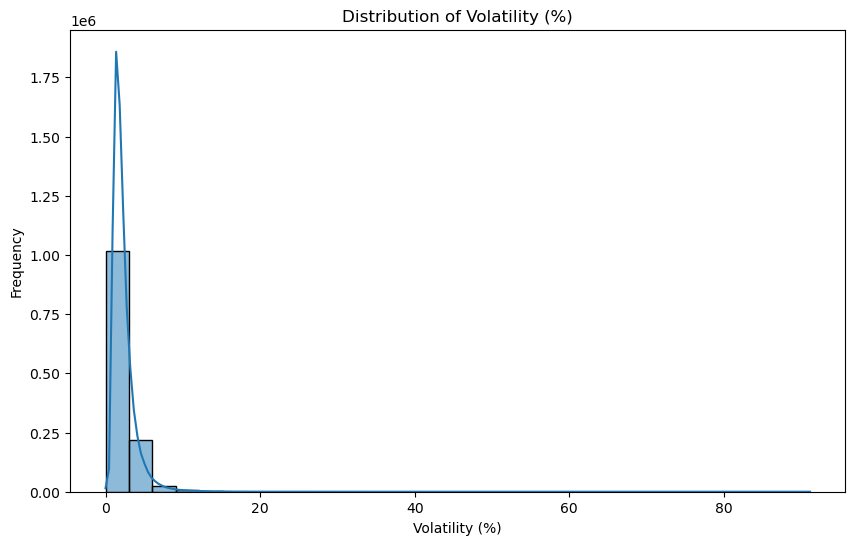

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(final_df['Volatility (%)'], kde=True, bins=30)
plt.title('Distribution of Volatility (%)')
plt.xlabel('Volatility (%)')
plt.ylabel('Frequency')
plt.show()

In [48]:
final_df['Cumulative_Returns'] = final_df.groupby('Symbol')['Close'].pct_change().cumsum()

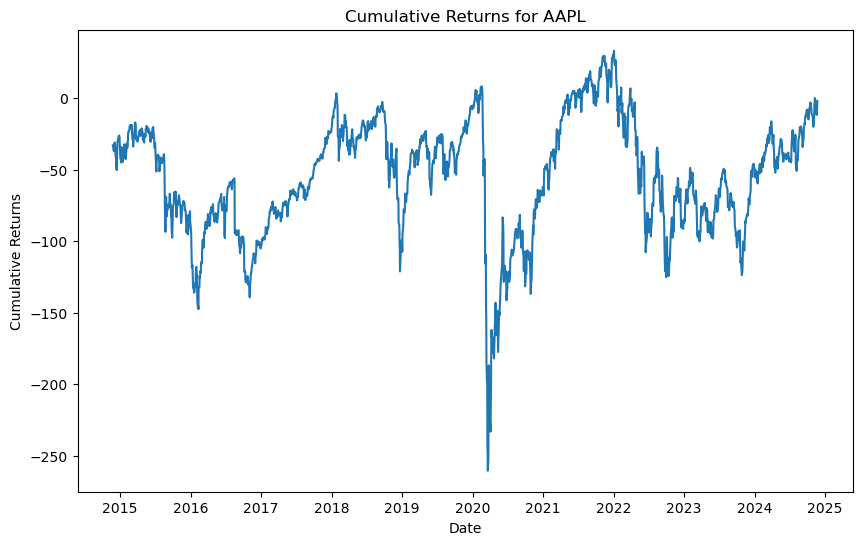

In [49]:
sample_stock = final_df[final_df['Symbol'] == 'AAPL']  # Replace with any symbol
plt.figure(figsize=(10, 6))
plt.plot(sample_stock['Date'], sample_stock['Cumulative_Returns'])
plt.title('Cumulative Returns for AAPL')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

## Predictive Modeling

Linear Regression Predictive Modeling Results:
Mean Squared Error: 7061.283922470623
R-squared Score: 0.8883612232079039
Feature Coefficients:
                Feature   Coefficient
0             Marketcap  8.497796e-12
1                Volume -8.132692e-09
2         Revenuegrowth  5.550026e+00
3          Currentprice -5.841060e-02
4        Volatility (%)  1.850128e+00
5  Relative_Performance  4.025412e+03


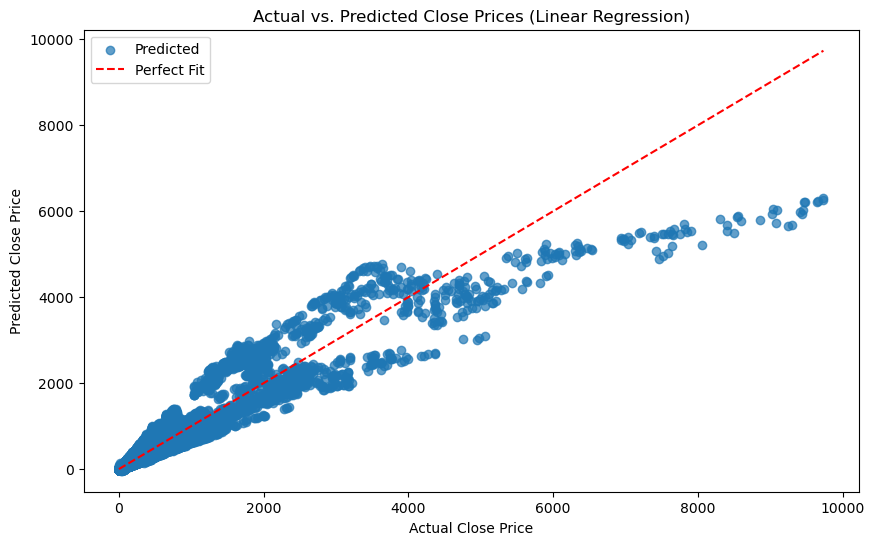

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features for the model
features = ['Marketcap', 'Volume', 'Revenuegrowth', 'Currentprice', 'Volatility (%)', 'Relative_Performance']

X = final_df[features].dropna()
y = final_df['Close'].dropna()

X, y = X.align(y, join='inner', axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Predictive Modeling Results:")
print(f"Mean Squared Error: {mse_lr}")
print(f"R-squared Score: {r2_lr}")

coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': lr_model.coef_
})
print("Feature Coefficients:")
print(coefficients)

# Visualize actual vs. predicted values
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.7, label='Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
plt.title('Actual vs. Predicted Close Prices (Linear Regression)')
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.legend()
plt.show()

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_and_evaluate(target_variable, features):
    # Prepare the input (X) and target (y)
    y = final_df[target_variable].dropna()
    X = final_df[features].dropna()

    # Ensure X and y are aligned
    X, y = X.align(y, join='inner', axis=0)

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print evaluation metrics
    print(f"Predicting {target_variable}:")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}\n")

    return y_test, y_pred, target_variable

# Predictions for each target variable
volume_results = train_and_evaluate(
    target_variable='Volume',
    features=['Marketcap', 'Close', 'Revenuegrowth', 'Currentprice', 'Volatility (%)', 'Relative_Performance']
)

revenue_growth_results = train_and_evaluate(
    target_variable='Revenuegrowth',
    features=['Marketcap', 'Volume', 'Close', 'Currentprice', 'Volatility (%)', 'Relative_Performance']
)

# Add lagged features for next-day prediction
final_df['Close_t-1'] = final_df['Close'].shift(1)
final_df['Close_t-2'] = final_df['Close'].shift(2)
next_day_price_results = train_and_evaluate(
    target_variable='Close',
    features=['Close_t-1', 'Close_t-2', 'Volume', 'Marketcap', 'Currentprice', 'Volatility (%)']
)

Predicting Volume:
Mean Squared Error: 500040338130924.4
R-squared Score: 0.35048481376970764

Predicting Revenuegrowth:
Mean Squared Error: 0.03003893787364297
R-squared Score: 0.06145677800240745

Predicting Close:
Mean Squared Error: 17326.218349302173
R-squared Score: 0.6990056933461989



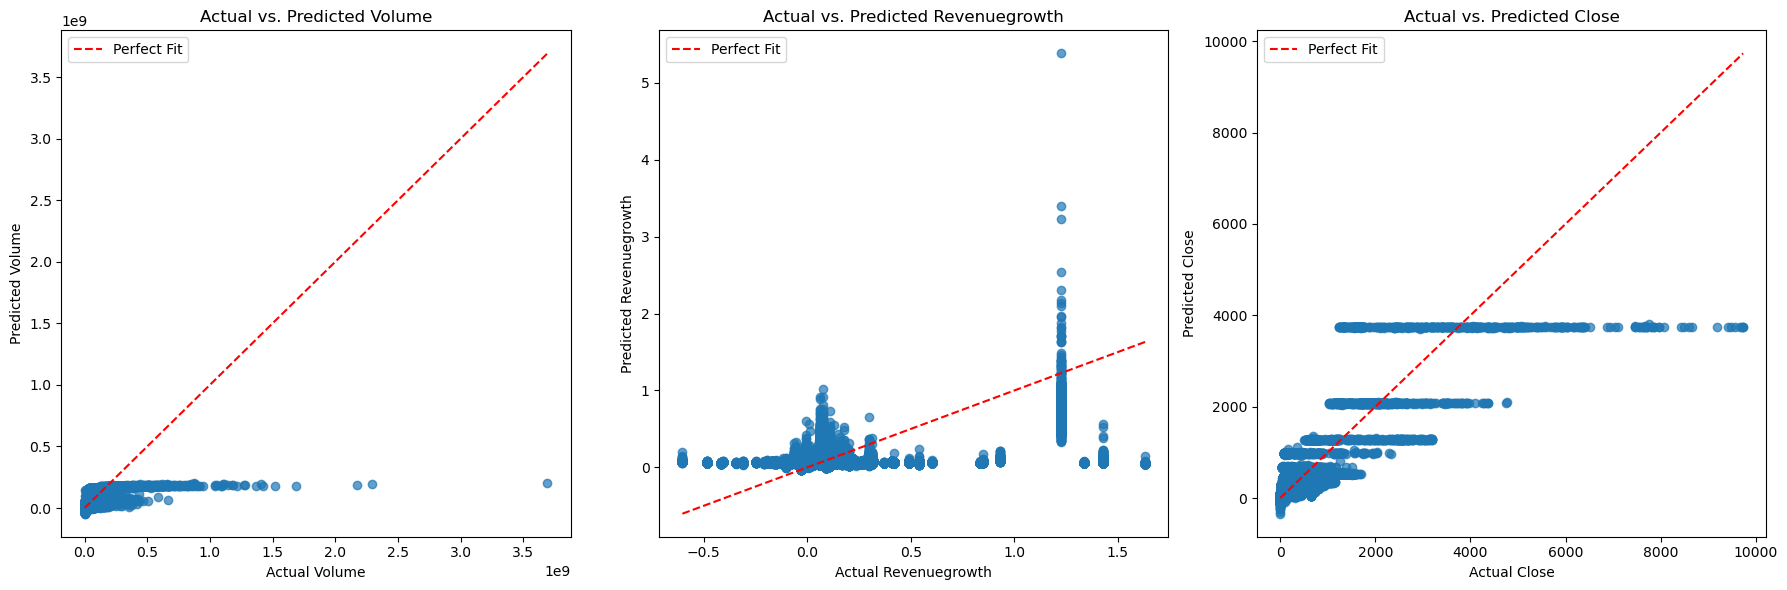

In [53]:
import matplotlib.pyplot as plt

# Function to create a side-by-side visualization of results
def plot_results(results, ax):
    y_test, y_pred, title = results
    ax.scatter(y_test, y_pred, alpha=0.7)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Fit')
    ax.set_title(f'Actual vs. Predicted {title}')
    ax.set_xlabel(f'Actual {title}')
    ax.set_ylabel(f'Predicted {title}')
    ax.legend()

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each result in its subplot
plot_results(volume_results, axes[0])
plot_results(revenue_growth_results, axes[1])
plot_results(next_day_price_results, axes[2])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

# Summary of Key Findings 

- The dataset captures detailed stock and company-level data, with sectors like Technology, Industrials, and Financial Services dominating the S&P 500.
Stock close prices are mostly below 200 usd, with notable outliers exceeding 9000 usd, indicating significant market disparity.
Sectoral Observations:

- Technology and Healthcare sectors showed consistent growth over time, while Real Estate and Utilities remained stable with lower returns.
Energy and Basic Materials sectors experienced higher volatility, reflecting sensitivity to external market conditions.
Sector-wise clustering revealed unique characteristics, such as high-revenue stocks in Technology and outliers like NVR in niche sectors.
Clustering Insights:

- K-means clustering identified five distinct clusters based on PCA-transformed features.
High-revenue, high-marketcap stocks (Cluster 2) contrasted with low-growth, low-marketcap stocks (Cluster 1).
Cluster 4 contained highly traded, volatile stocks like META, reflecting market activity hotspots.
Feature Engineering Highlights:

- Volatility (%): Technology and Energy sectors displayed the highest volatility, consistent with industry trends.
Relative Performance: Stocks like AAPL consistently outperformed the S&P 500 index, indicating strong market leadership.
Cumulative Returns: Individual stock returns highlighted leaders and laggards within the market.
Predictive Modeling:

- Close Price Prediction: Achieved strong accuracy (R² = 0.88) with Revenuegrowth and Relative Performance being significant predictors.
Volume Prediction: Moderate success (R² = 0.35) indicates challenges in modeling trading activity due to external influences.
Revenuegrowth Prediction: Limited accuracy (R² = 0.06) reflects the complex, dynamic nature of growth metrics.
Next-Day Price Prediction: Reasonable predictive power (R² = 0.69) using lagged close prices and market-related features.
Visualization Insights:

- Outlier analysis highlighted stocks like NVR (high price, low volume) and META (high trading volume), reflecting unique market positions.

# Refelctions and Conclusions

## **Reflections**
1. **Challenges Faced:**
   - **Data Preprocessing:**
     - Handling missing values in financial features like `Marketcap`, `Revenuegrowth`, and `Volume` was challenging, especially ensuring the data's consistency across different datasets.
     - Combining three datasets (`sp500_stocks.csv`, `sp500_companies.csv`, `sp500_index.csv`) required careful alignment of dates and symbols.
   - **Principal Component Analysis (PCA):**
     - Deciphering which features contributed most to the principal components was challenging but informative. Features like `Marketcap`, `Close`, and `Currentprice` had the highest influence on PCA components.
   - **Clustering:**
     - Determining the optimal number of clusters (k) for k-means required iterative testing and visual inspection.
     - Some clusters contained clear outliers, which were challenging to interpret.
   - **Predictive Modeling:**
     - Predicting certain variables like `Revenuegrowth` was difficult due to low R-squared values, indicating insufficient explanatory power of the features used.
     - Forecasting next-day prices required careful engineering of lagged features.

2. **What Worked Well:**
   - **PCA:**
     - PCA effectively reduced dimensionality and visualized the dataset in 2D, highlighting patterns in the data.
   - **Clustering:**
     - The k-means clustering algorithm grouped stocks effectively, with clear distinctions in features like `Marketcap` and `Sector`.
   - **Predictive Models:**
     - The linear regression model for predicting `Close` prices performed well, achieving a high R-squared value (0.88), indicating strong predictive power for stock prices.

3. **What Didn’t Work Well:**
   - Predicting `Volume` and `Revenuegrowth` yielded lower accuracy, likely due to the inherent randomness and noisiness in these financial metrics.
   - Certain sectors or industries lacked sufficient representation, which limited the generalizability of insights for those groups.

4. **Lessons Learned:**
   - Combining datasets with consistent keys and aligning features across different timeframes is critical for financial analysis.
   - PCA is a powerful tool for dimensionality reduction but requires careful interpretation of component contributions.
   - Clustering provides insights into patterns within the dataset but is sensitive to outliers and requires thorough parameter tuning.

---

## **Conclusions**
1. **Key Insights:**
   - **Sector Trends:**
     - Technology, Industrials, and Financial Services were the most represented sectors in the dataset, contributing to the highest number of companies.
     - Sector-wise performance analysis revealed that stock prices and volatility varied significantly by sector, with Technology and Healthcare showing the most growth.
   - **Market Behavior:**
     - Correlation analysis highlighted a strong relationship between `Close` prices and `Marketcap`, indicating that larger companies tend to have more stable and higher stock prices.
     - The `Relative_Performance` metric provided a meaningful comparison of individual stock performance against the S&P 500 index.
   - **Clustering:**
     - Clustering revealed distinct groups of companies based on financial metrics, with clear separations in `Marketcap` and `Currentprice`. Outliers like Meta Platforms and NVR highlighted unique growth or price patterns.
   - **Predictive Models:**
     - The linear regression model effectively predicted `Close` prices, with an R-squared score of 0.88. However, predicting `Volume` and `Revenuegrowth` was less accurate due to noisier data and weaker feature relationships.

2. **Future Work:**
   - Incorporate additional features like macroeconomic indicators (e.g., interest rates, GDP growth) to improve predictive power.
   - Explore advanced machine learning models like Random Forest or Gradient Boosting for more accurate predictions.
   - Perform time-series analysis to model long-term trends and seasonal behaviors in stock prices and volumes.
   - Investigate sector-specific trends and predictions to provide more granular insights.

3. **Overall Impact:**
   - This analysis provided a comprehensive exploration of the S&P 500 dataset, leveraging PCA, clustering, and predictive modeling to derive meaningful insights.
   - The results highlight the potential of machine learning and statistical techniques to analyze complex financial datasets, enabling better decision-making for investors and analysts.